In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import torch
import numpy as np

In [207]:
aug = torch.load('../outputs/test/epistemic.pt').numpy()
na = torch.load('../outputs/nonaug/epistemic.pt').numpy()

In [208]:
oods = torch.load('../outputs/test/oods.pt').numpy()

In [209]:
aug_ood = aug[:, 0, :, :][oods.astype(np.bool_)]
aug_id = aug[:, 0, :, :][~oods.astype(np.bool_)]

na_ood = na[:, 0, :, :][oods.astype(np.bool_)]
na_id = na[:, 0, :, :][~oods.astype(np.bool_)]

In [221]:
na_id.max()

0.3043102

In [222]:
na_ood.max()

0.08473098

Text(0.5, 0, 'Vacuity')

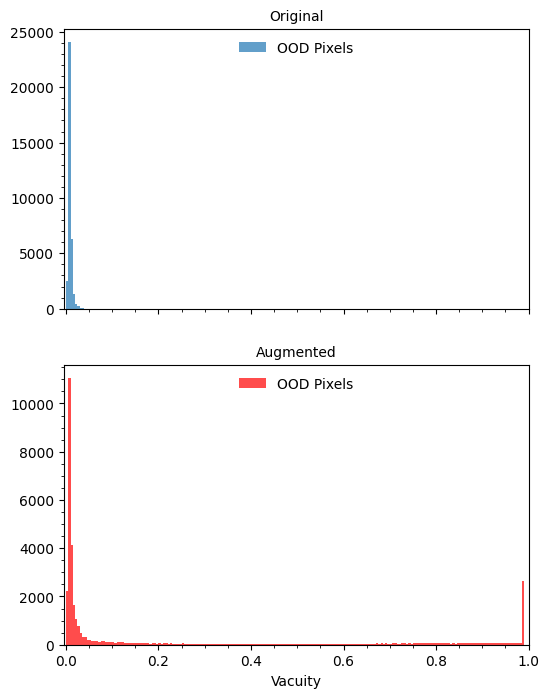

In [220]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

axs[0].hist(na_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7)
# axs[0].hist(na_id.flatten(), bins=200, label="ID Pixels", range=(0, 1), alpha=.7)
axs[0].set_title("Original", fontsize=10)

axs[1].hist(aug_ood.flatten(), bins=50, label="OOD Pixels", range=(0, 1), alpha=.7, color='r')
# axs[1].hist(aug_id.flatten(), bins=200, label="ID Pixels", range=(0, 1), alpha=.7, color='r')
axs[1].set_title("Augmented", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    ax.set_xlim(-0.005, .25)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Vacuity")

In [9]:
ood_aug_unc = oods[aug[:,0,:,:] > .5].flatten().astype(int)

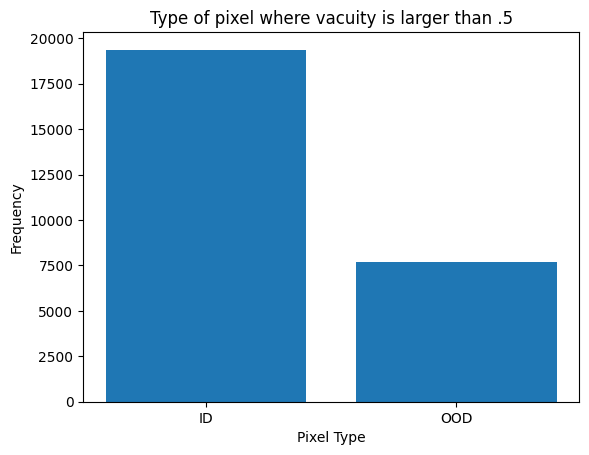

In [11]:
plt.bar(["ID", "OOD"], np.bincount(ood_aug_unc))
plt.xlabel('Pixel Type')
plt.ylabel('Frequency')  
plt.title("Type of pixel where vacuity is larger than .5")
plt.show()

In [187]:
focal_a = torch.load('../test/focal/aleatoric.pt').numpy()
ce_a = torch.load('../test/ce/aleatoric.pt').numpy()

In [188]:
focal_p = torch.load('../test/focal/preds.pt')
ce_p = torch.load('../test/ce/preds.pt')

In [189]:
focal_l = torch.load('../test/focal/ground_truth.pt')
ce_l = torch.load('../test/ce/ground_truth.pt')

In [190]:
focal_m = torch.argmax(focal_l, dim=1).cpu() != torch.argmax(focal_p, dim=1)
ce_m = torch.argmax(ce_l, dim=1).cpu() != torch.argmax(ce_p, dim=1)

In [191]:
focal_cor = focal_a.squeeze(1)[~focal_m]
focal_mis = focal_a.squeeze(1)[focal_m]

In [192]:
ce_cor = ce_a.squeeze(1)[~ce_m]
ce_mis = ce_a.squeeze(1)[ce_m]

Text(0.5, 0, 'Aleatoric')

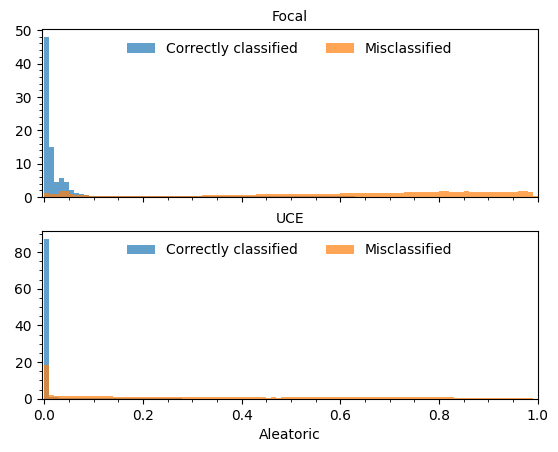

In [193]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(focal_cor.flatten(), bins=100, label="Correctly classified", range=(0, 1), alpha=.7, density=True)
axs[0].hist(focal_mis.flatten(), bins=100, label="Misclassified", range=(0, 1), alpha=.7, density=True)
axs[0].set_title("Focal", fontsize=10)

axs[1].hist(ce_cor.flatten(), bins=100, label="Correctly classified", range=(0, 1), alpha=.7, density=True)
axs[1].hist(ce_mis.flatten(), bins=100, label="Misclassified", range=(0, 1), alpha=.7, density=True)
axs[1].set_title("UCE", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    ax.set_xlim(-0.005, 1.0)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Aleatoric")
# a.set_ylabel("Frequency")

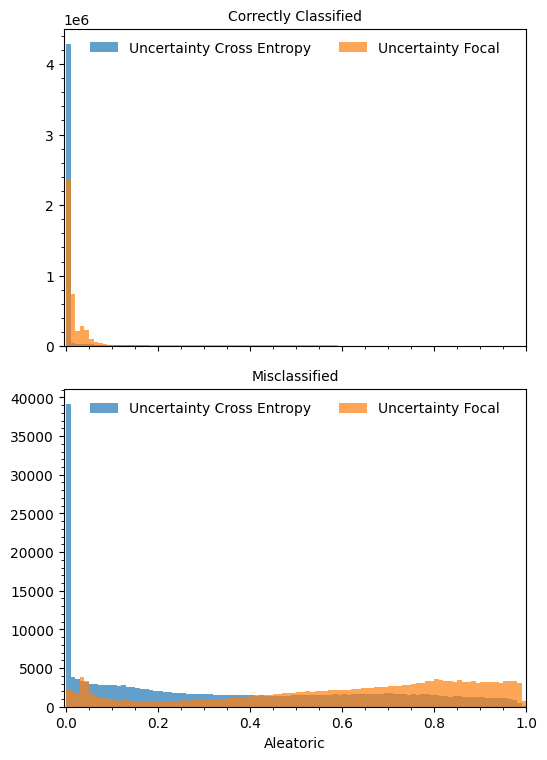

In [199]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

axs[0].hist(ce_cor.flatten(), bins=100, label="Uncertainty Cross Entropy", range=(0, 1), alpha=.7)
axs[0].hist(focal_cor.flatten(), bins=100, label="Uncertainty Focal", range=(0, 1), alpha=.7)
axs[0].set_title("Correctly Classified", fontsize=10)

axs[1].hist(ce_mis.flatten(), bins=100, label="Uncertainty Cross Entropy", range=(0, 1), alpha=.7)
axs[1].hist(focal_mis.flatten(), bins=100, label="Uncertainty Focal", range=(0, 1), alpha=.7)
axs[1].set_title("Misclassified", fontsize=10)

for ax in axs.flatten():
    ax.grid(False)
    ax.set_xlim(-0.005, 1.0)
    ax.legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.xaxis.get_ticklocs(minor=True)
    ax.minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Aleatoric")
fig.tight_layout()
# a.set_ylabel("Frequency")

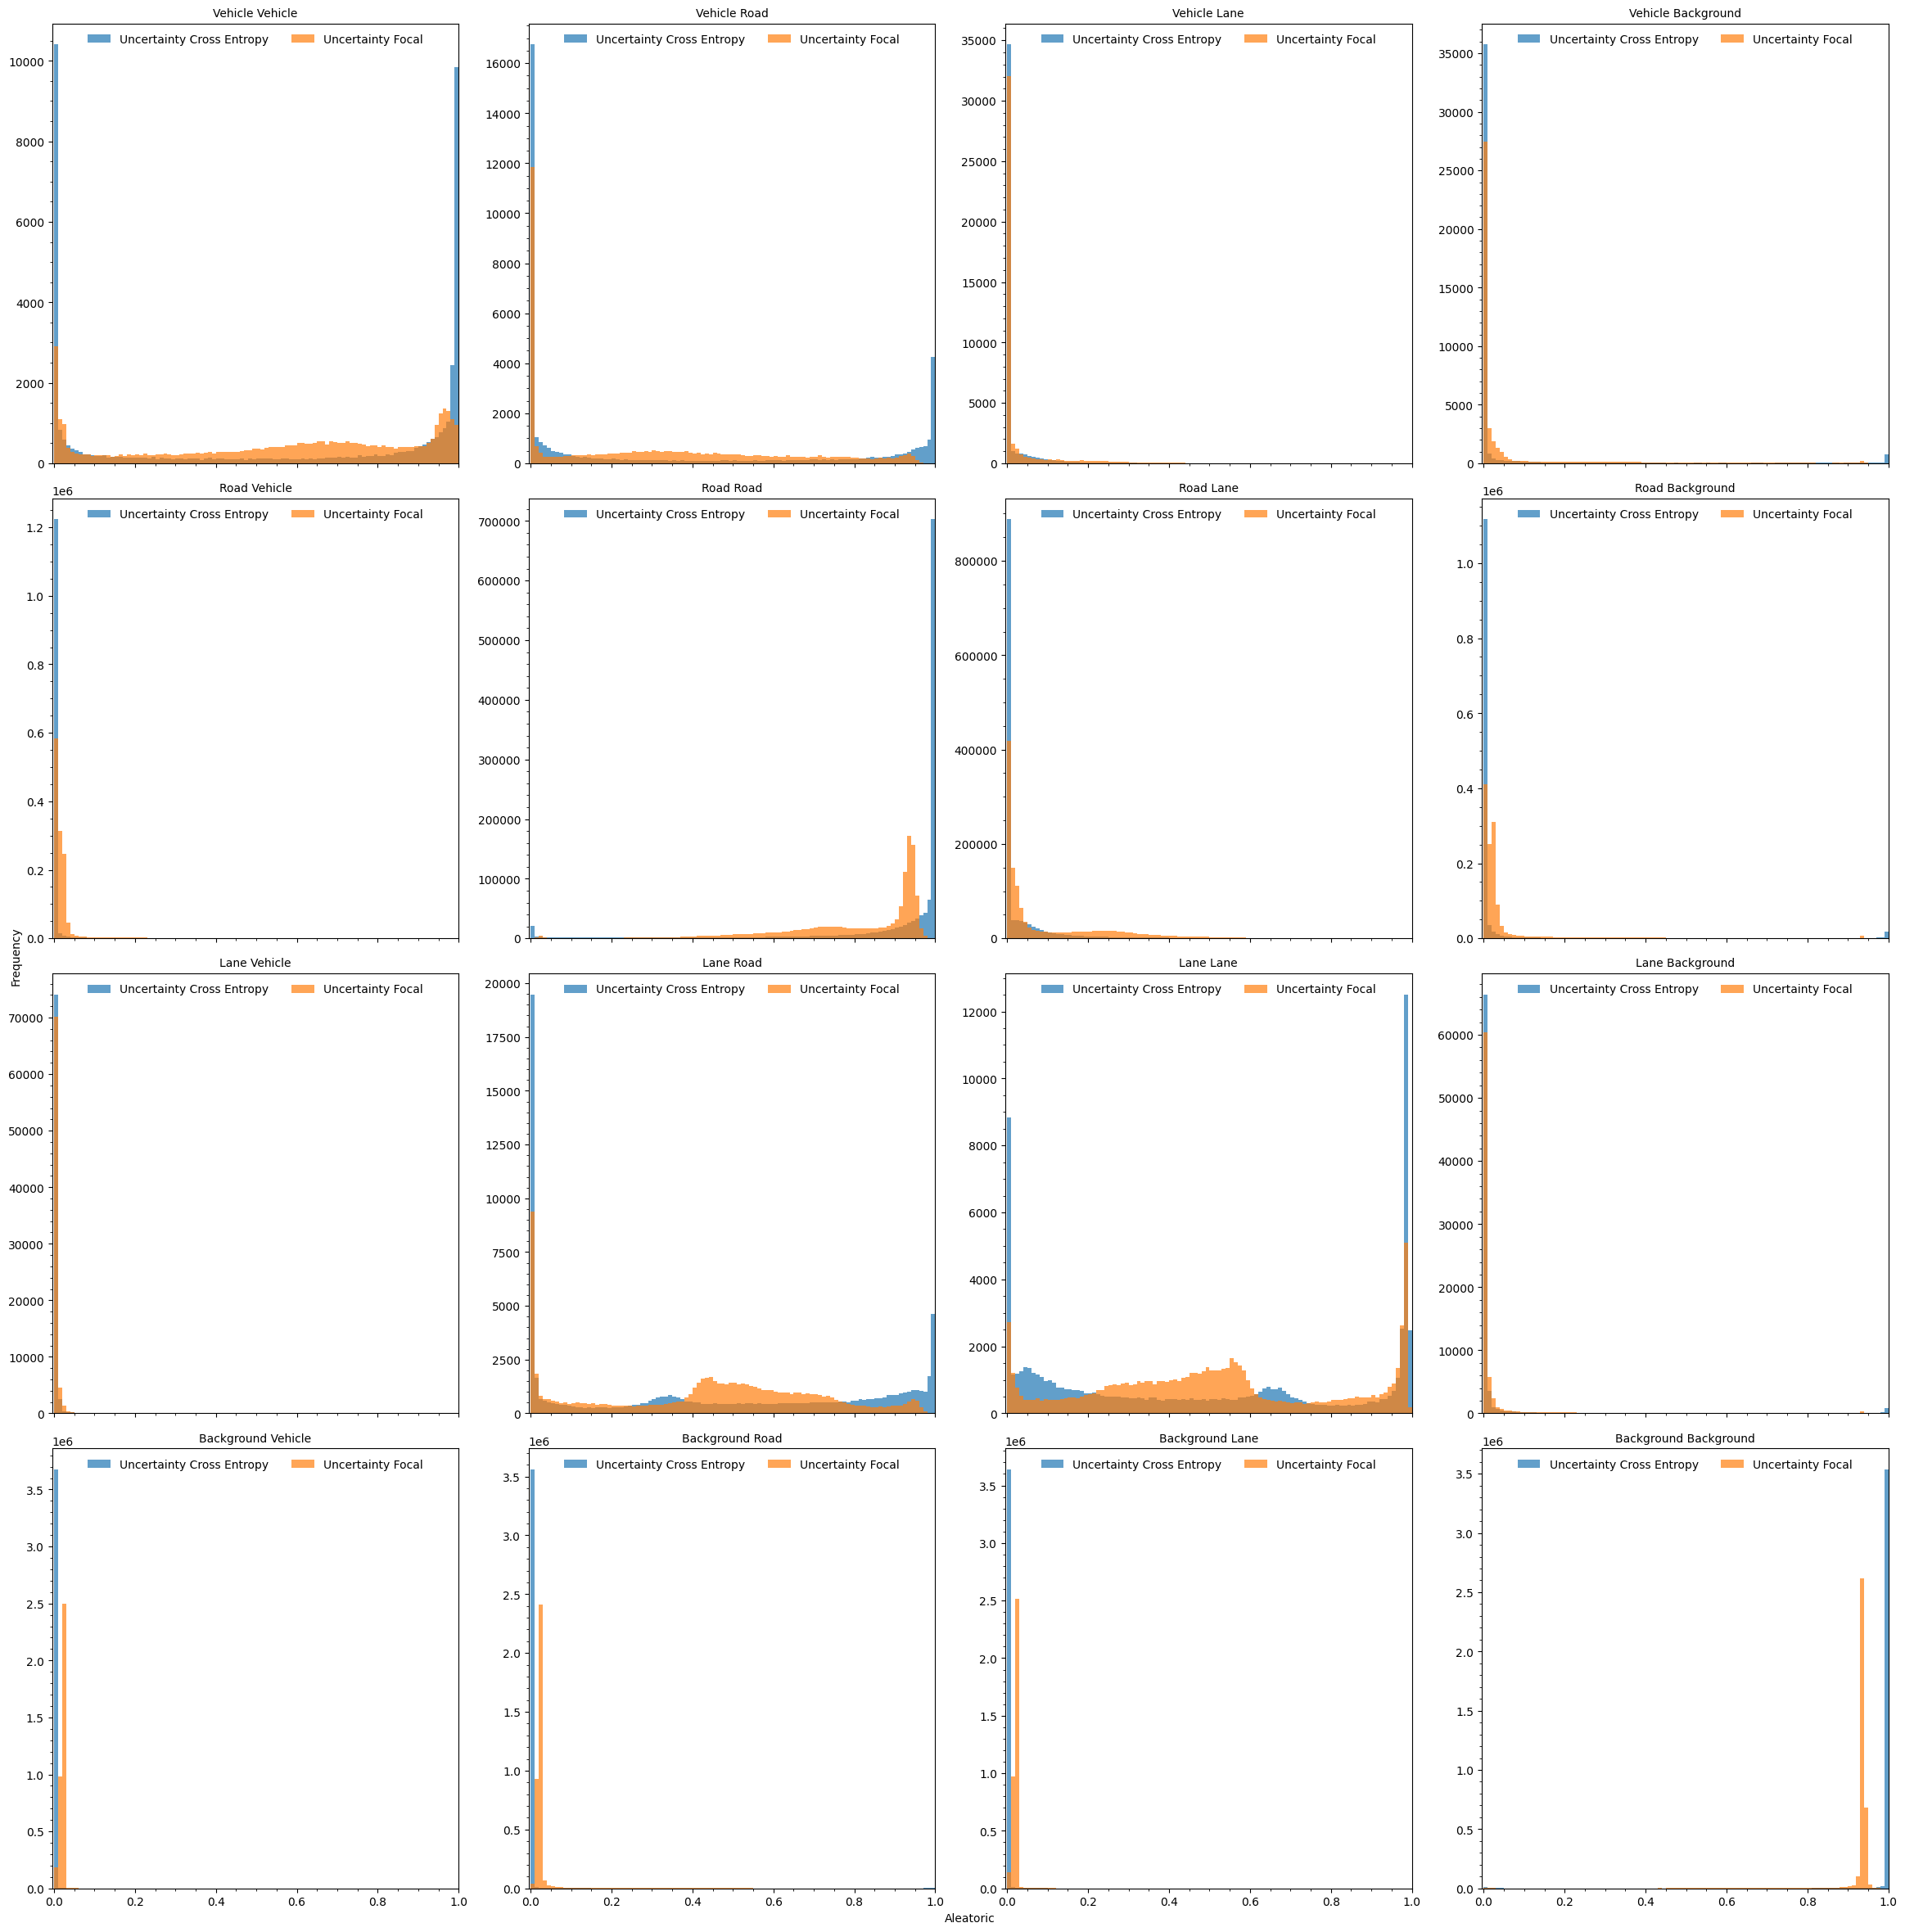

In [40]:
fig, axs = plt.subplots(4, 4, sharex=True, figsize=(24, 24))
classes = ['Vehicle', 'Road', 'Lane', 'Background']

for i in range(4):
    mask_ce = ce_l[:, i] == 1
    mask_focal = focal_l[:, i] == 1

    for j in range(4):
        ce_class = ce_p[:, j][mask_ce]
        focal_class = focal_p[:, j][mask_focal]
        
        axs[i, j].hist(ce_class.flatten(), bins=100, label="Uncertainty Cross Entropy", range=(0, 1), alpha=.7)
        axs[i, j].hist(focal_class.flatten(), bins=100, label="Uncertainty Focal", range=(0, 1), alpha=.7)
        axs[i, j].set_title(classes[i] + " " + classes[j], fontsize=10)
        
        axs[i, j].grid(False)
        axs[i, j].set_xlim(-0.005, 1.0)
        axs[i, j].legend(loc="upper center", frameon=False, ncol=2, fontsize=10)
        
        axs[i, j].yaxis.get_ticklocs(minor=True)
        axs[i, j].xaxis.get_ticklocs(minor=True)
        axs[i, j].minorticks_on()

a = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
a.set_xlabel("Aleatoric")
a.set_ylabel("Frequency")
plt.tight_layout() 

In [22]:
mask_ce = ce_l[:, 2] == 1
mask_focal = focal_l[:, 2] == 1

ce_class = ce_p[mask_ce, 2]
focal_class = focal_p[mask_focal, 2]

In [51]:
 np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

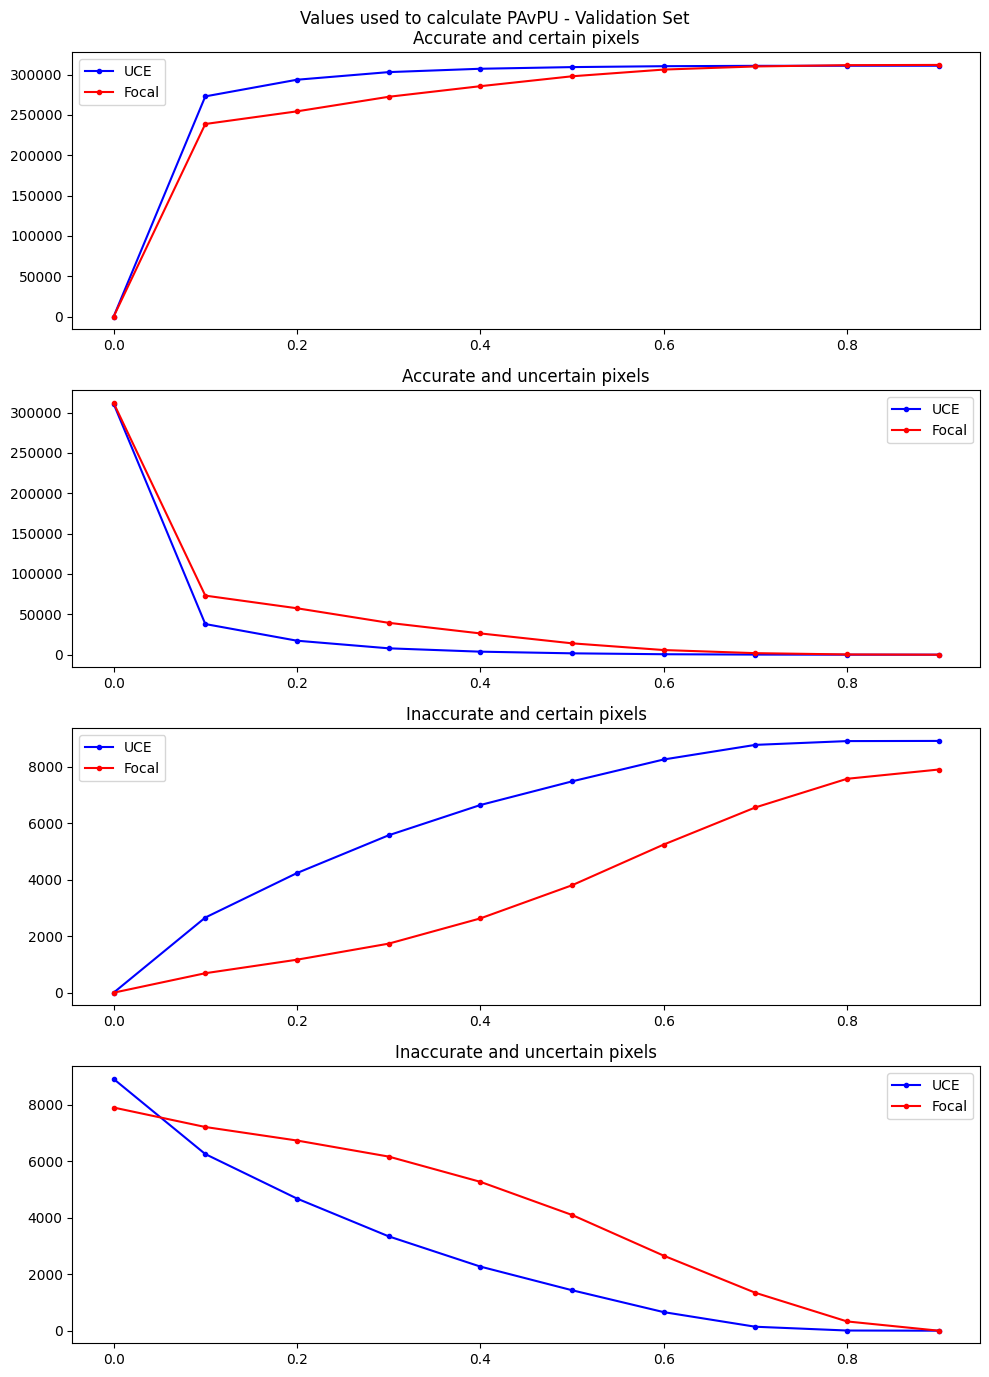

In [202]:
fig, axs = plt.subplots(4, 1, figsize=(10, 14))
fig.suptitle("Values used to calculate PAvPU - Validation Set")

stat_ce = [[0.0, 272972.0, 293617.0, 303053.0, 307209.0, 309265.0, 310382.0, 310827.0, 310942.0, 310949.0], [310949.0, 37977.0, 17332.0, 7896.0, 3740.0, 1684.0, 567.0, 122.0, 7.0, 0.0], [0.0, 2663.0, 4240.0, 5579.0, 6651.0, 7489.0, 8265.0, 8783.0, 8917.0, 8923.0], [8923.0, 6260.0, 4683.0, 3344.0, 2272.0, 1434.0, 658.0, 140.0, 6.0, 0.0]]
stat_focal = [[0.0, 238762.0, 254438.0, 272475.0, 285608.0, 297882.0, 306209.0, 310060.0, 311670.0, 311963.0], [311963.0, 73201.0, 57525.0, 39488.0, 26355.0, 14081.0, 5754.0, 1903.0, 293.0, 0.0], [0.0, 690.0, 1169.0, 1738.0, 2633.0, 3807.0, 5250.0, 6566.0, 7581.0, 7909.0], [7909.0, 7219.0, 6740.0, 6171.0, 5276.0, 4102.0, 2659.0, 1343.0, 328.0, 0.0]]
labels = ["Accurate and certain pixels", "Accurate and uncertain pixels", "Inaccurate and certain pixels", "Inaccurate and uncertain pixels"]

for i in range(4):
    axs[i].plot(np.arange(0, 1, .1), stat_ce[i], 'b.-', label='UCE')
    axs[i].plot(np.arange(0, 1, .1), stat_focal[i], 'r.-', label='Focal')
    axs[i].legend()
    axs[i].set_title(labels[i])

fig.tight_layout()

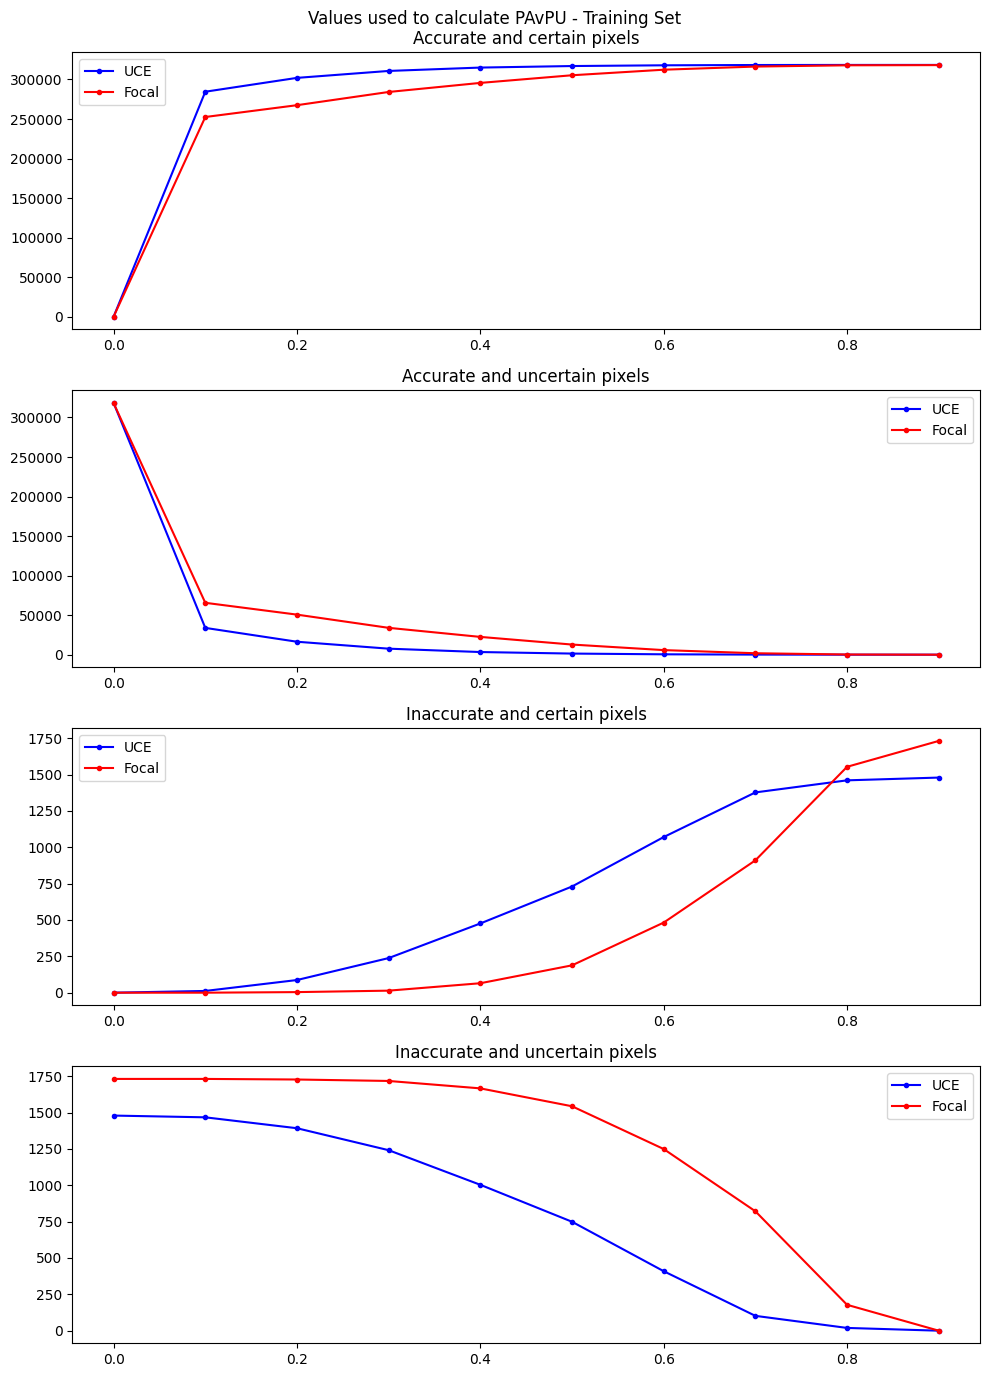

In [203]:
fig, axs = plt.subplots(4, 1, figsize=(10, 14))
fig.suptitle("Values used to calculate PAvPU - Training Set")

stat_ce = [[0.0, 284508.0, 302010.0, 310780.0, 315045.0, 316982.0, 317911.0, 318275.0, 318384.0, 318393.0], [318393.0, 33885.0, 16383.0, 7613.0, 3348.0, 1411.0, 482.0, 118.0, 9.0, 0.0], [0.0, 12.0, 87.0, 238.0, 476.0, 730.0, 1070.0, 1377.0, 1460.0, 1479.0], [1479.0, 1467.0, 1392.0, 1241.0, 1003.0, 749.0, 409.0, 102.0, 19.0, 0.0]]
stat_focal = [[0.0, 252524.0, 267469.0, 284181.0, 295645.0, 305320.0, 312341.0, 316315.0, 317908.0, 318141.0], [318141.0, 65617.0, 50672.0, 33960.0, 22496.0, 12821.0, 5800.0, 1826.0, 233.0, 0.0], [0.0, 0.0, 4.0, 14.0, 65.0, 188.0, 482.0, 910.0, 1553.0, 1731.0], [1731.0, 1731.0, 1727.0, 1717.0, 1666.0, 1543.0, 1249.0, 821.0, 178.0, 0.0]]
labels = ["Accurate and certain pixels", "Accurate and uncertain pixels", "Inaccurate and certain pixels", "Inaccurate and uncertain pixels"]

for i in range(4):
    axs[i].plot(np.arange(0, 1, .1), stat_ce[i], 'b.-', label='UCE')
    axs[i].plot(np.arange(0, 1, .1), stat_focal[i], 'r.-', label='Focal')
    axs[i].legend()
    axs[i].set_title(labels[i])

fig.tight_layout()

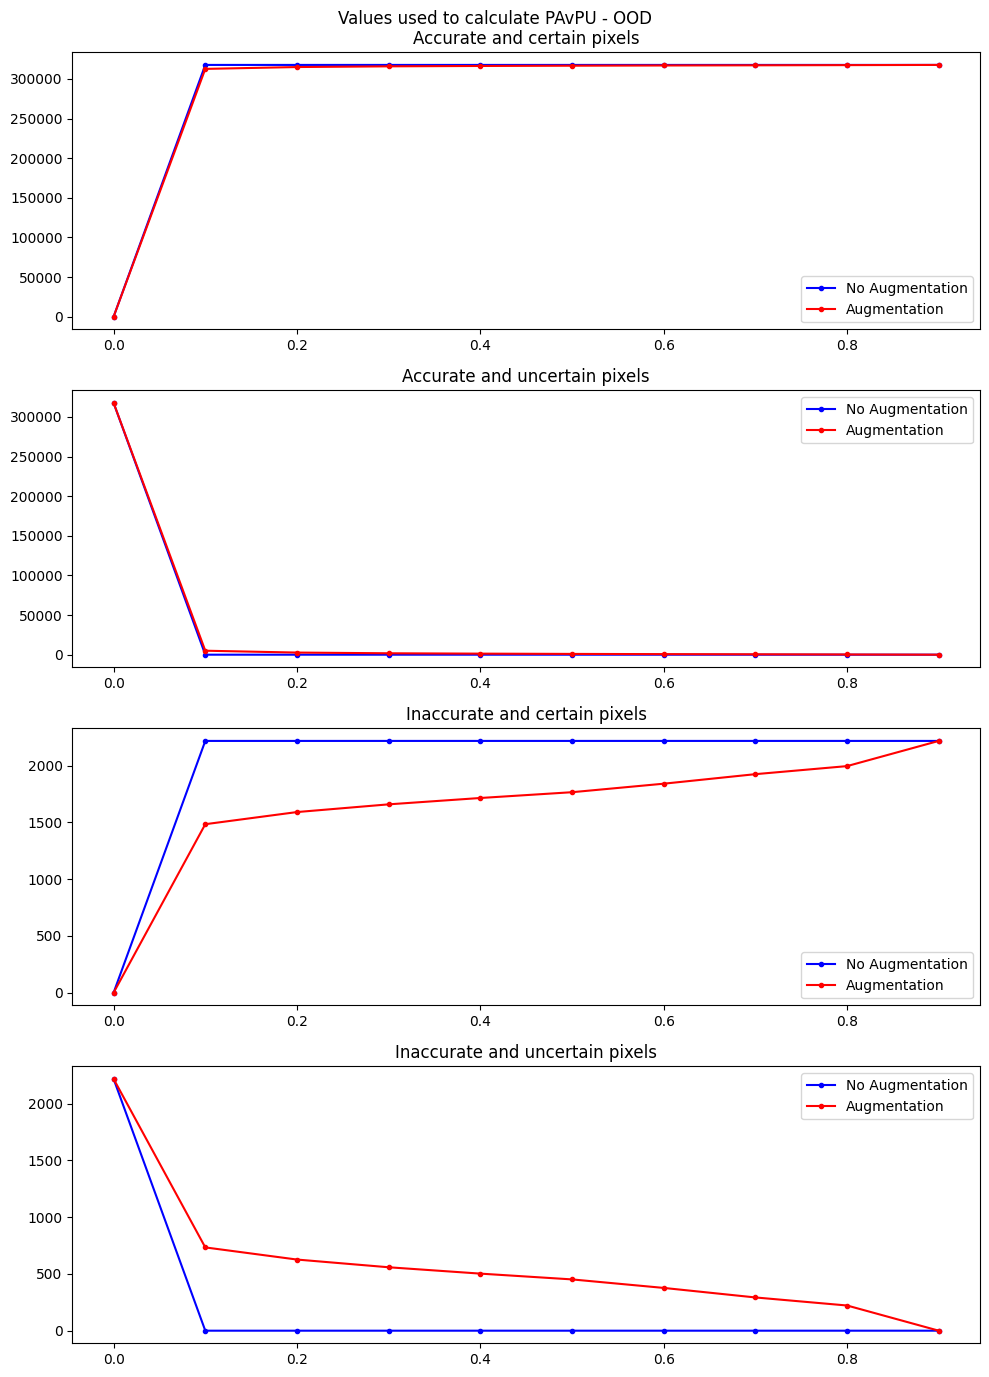

In [205]:
fig, axs = plt.subplots(4, 1, figsize=(10, 14))
fig.suptitle("Values used to calculate PAvPU - OOD")

stat_noaug = [[0.0, 317653.0, 317653.0, 317653.0, 317653.0, 317653.0, 317653.0, 317653.0, 317653.0, 317653.0], [317653.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2219.0, 2219.0, 2219.0, 2219.0, 2219.0, 2219.0, 2219.0, 2219.0, 2219.0], [2219.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
stat_aug = [[0.0, 312641.0, 314980.0, 315874.0, 316330.0, 316671.0, 316943.0, 317159.0, 317389.0, 317653.0], [317653.0, 5012.0, 2673.0, 1779.0, 1323.0, 982.0, 710.0, 494.0, 264.0, 0.0], [0.0, 1485.0, 1592.0, 1660.0, 1716.0, 1767.0, 1842.0, 1926.0, 1997.0, 2219.0], [2219.0, 734.0, 627.0, 559.0, 503.0, 452.0, 377.0, 293.0, 222.0, 0.0]]
labels = ["Accurate and certain pixels", "Accurate and uncertain pixels", "Inaccurate and certain pixels", "Inaccurate and uncertain pixels"]

for i in range(4):
    axs[i].plot(np.arange(0, 1, .1), stat_noaug[i], 'b.-', label='No Augmentation')
    axs[i].plot(np.arange(0, 1, .1), stat_aug[i], 'r.-', label='Augmentation')
    axs[i].legend()
    axs[i].set_title(labels[i])

fig.tight_layout()

In [5]:
from sklearn.manifold import TSNE

In [62]:
y_pred = torch.tensor([[
    [[.5, .5],
    [.7, .3]],
    [[.9, .1],
    [.2, .8]],
]]).float()

y_label = torch.tensor([[
    [[1, 0],
    [1, 0]],
    [[1, 0],
    [0, 1]],
]]).float()

In [63]:
y_pred.shape

torch.Size([1, 2, 2, 2])

In [64]:
y_pred = y_pred.view(1 * 2, 4)
y_label = y_label.view(1 * 2, 4)

In [65]:
y_pred.shape

torch.Size([2, 4])

In [66]:
X_tsne = TSNE(n_components=2, init='random', perplexity=10).fit_transform(y_pred)

In [68]:
X_tsne.shape

(2, 2)

In [70]:
plt.figure(figsize=(12, 8))
colors = ['r', 'b']
for i in range(2):
    mask = y_label == i
    print(mask.shape)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=colors[i], label=f'Class {i}')
plt.legend()
plt.title('t-SNE Visualization of Semantic Segmentation Classes')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

torch.Size([2, 4])


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1200x800 with 0 Axes>